# Title

# Load and take a look at the data

In [127]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [128]:
# Load data
ds=pd.read_csv('csse_covid_19_daily_reports_us.csv')

In [129]:
ds.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [130]:
ds.shape

(58, 18)

In [131]:
ds.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

# Check and treat null values

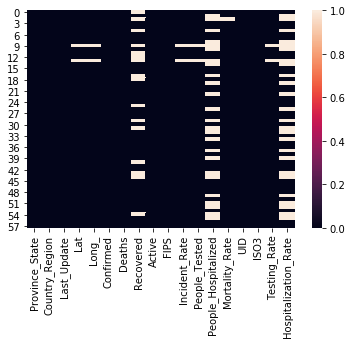

In [132]:
sns.heatmap(ds.isnull())

In [133]:
ds.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [134]:
# Drop columns with a lot of null values - dataset renamed to nds (new dataset)
newds=ds.drop(columns=['People_Hospitalized','Hospitalization_Rate'])

In [135]:
newds.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate'],
      dtype='object')

In [136]:
# Remove all rows with null values from dataset
cleands=newds.dropna()

In [137]:
cleands.isnull().sum()

Province_State    0
Country_Region    0
Last_Update       0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         0
Active            0
FIPS              0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
UID               0
ISO3              0
Testing_Rate      0
dtype: int64

In [138]:
cleands.shape

(42, 16)

# Check correlation

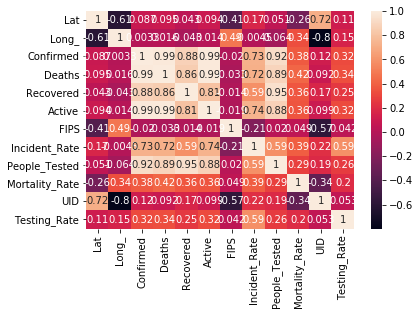

In [139]:
dscor=cleands.corr()
sns.heatmap(dscor, annot=True)

The target columns correlate well with all columns.

# Summary statistics

In [140]:
cleands.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,Testing_Rate
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.000000,4.200000e+01,42.000000
mean,38.082448,-82.003293,23920.690476,1539.952381,7007.428571,15373.309524,33.428571,397.559309,1.769303e+05,4.454731,7.800007e+07,4119.202441
std,8.790009,55.248234,58136.646383,4669.624516,11674.490020,43615.982934,18.539533,427.618598,2.588742e+05,2.218540,2.189540e+07,1958.801740
min,13.444300,-157.498300,21.000000,2.000000,13.000000,2.000000,2.000000,38.082112,1.383000e+03,1.101269,3.160000e+02,1289.294104
25%,35.118600,-103.929325,2197.750000,70.000000,970.000000,748.250000,20.250000,139.910412,4.166725e+04,2.837903,8.400002e+07,2774.742113
50%,39.061850,-89.647600,7938.500000,307.500000,3008.000000,4035.500000,33.500000,240.173860,1.156380e+05,4.215735,8.400003e+07,3478.415535
75%,43.421025,-75.830850,18226.500000,741.750000,7326.750000,7882.250000,46.750000,454.643698,1.766762e+05,5.318228,8.400004e+07,5153.860024
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,78.000000,1821.620216,1.505836e+06,9.545549,8.400006e+07,11377.424693


# Data visualizations

# Encode categorical columns to numeric values

In [141]:
eds=cleands

In [142]:
eds.dtypes

Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
FIPS                int64
Incident_Rate     float64
People_Tested     float64
Mortality_Rate    float64
UID                 int64
ISO3               object
Testing_Rate      float64
dtype: object

In [143]:
eds.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate'],
      dtype='object')

In [144]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Province_State', 'Country_Region', 'ISO3']
for col in cols:
    eds[col] = le.fit_transform(eds[col])

In [145]:
eds.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate
1,0,0,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,84000002,2,5063.940017
3,1,0,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,84000004,2,2272.859351
4,2,0,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,84000005,2,3189.670370
6,3,0,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,84000008,2,2289.339188
7,4,0,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,84000009,2,5349.302875


# Check correlation after encoding

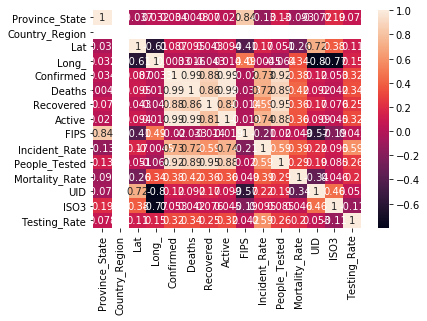

In [146]:
dscor=eds.corr()
sns.heatmap(dscor, annot=True)

# Drop irrelevant columns

In [147]:
eds.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate'],
      dtype='object')

In [148]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=eds.drop(columns=['Last_Update', 'Lat', 'Long_','UID', 'FIPS'])

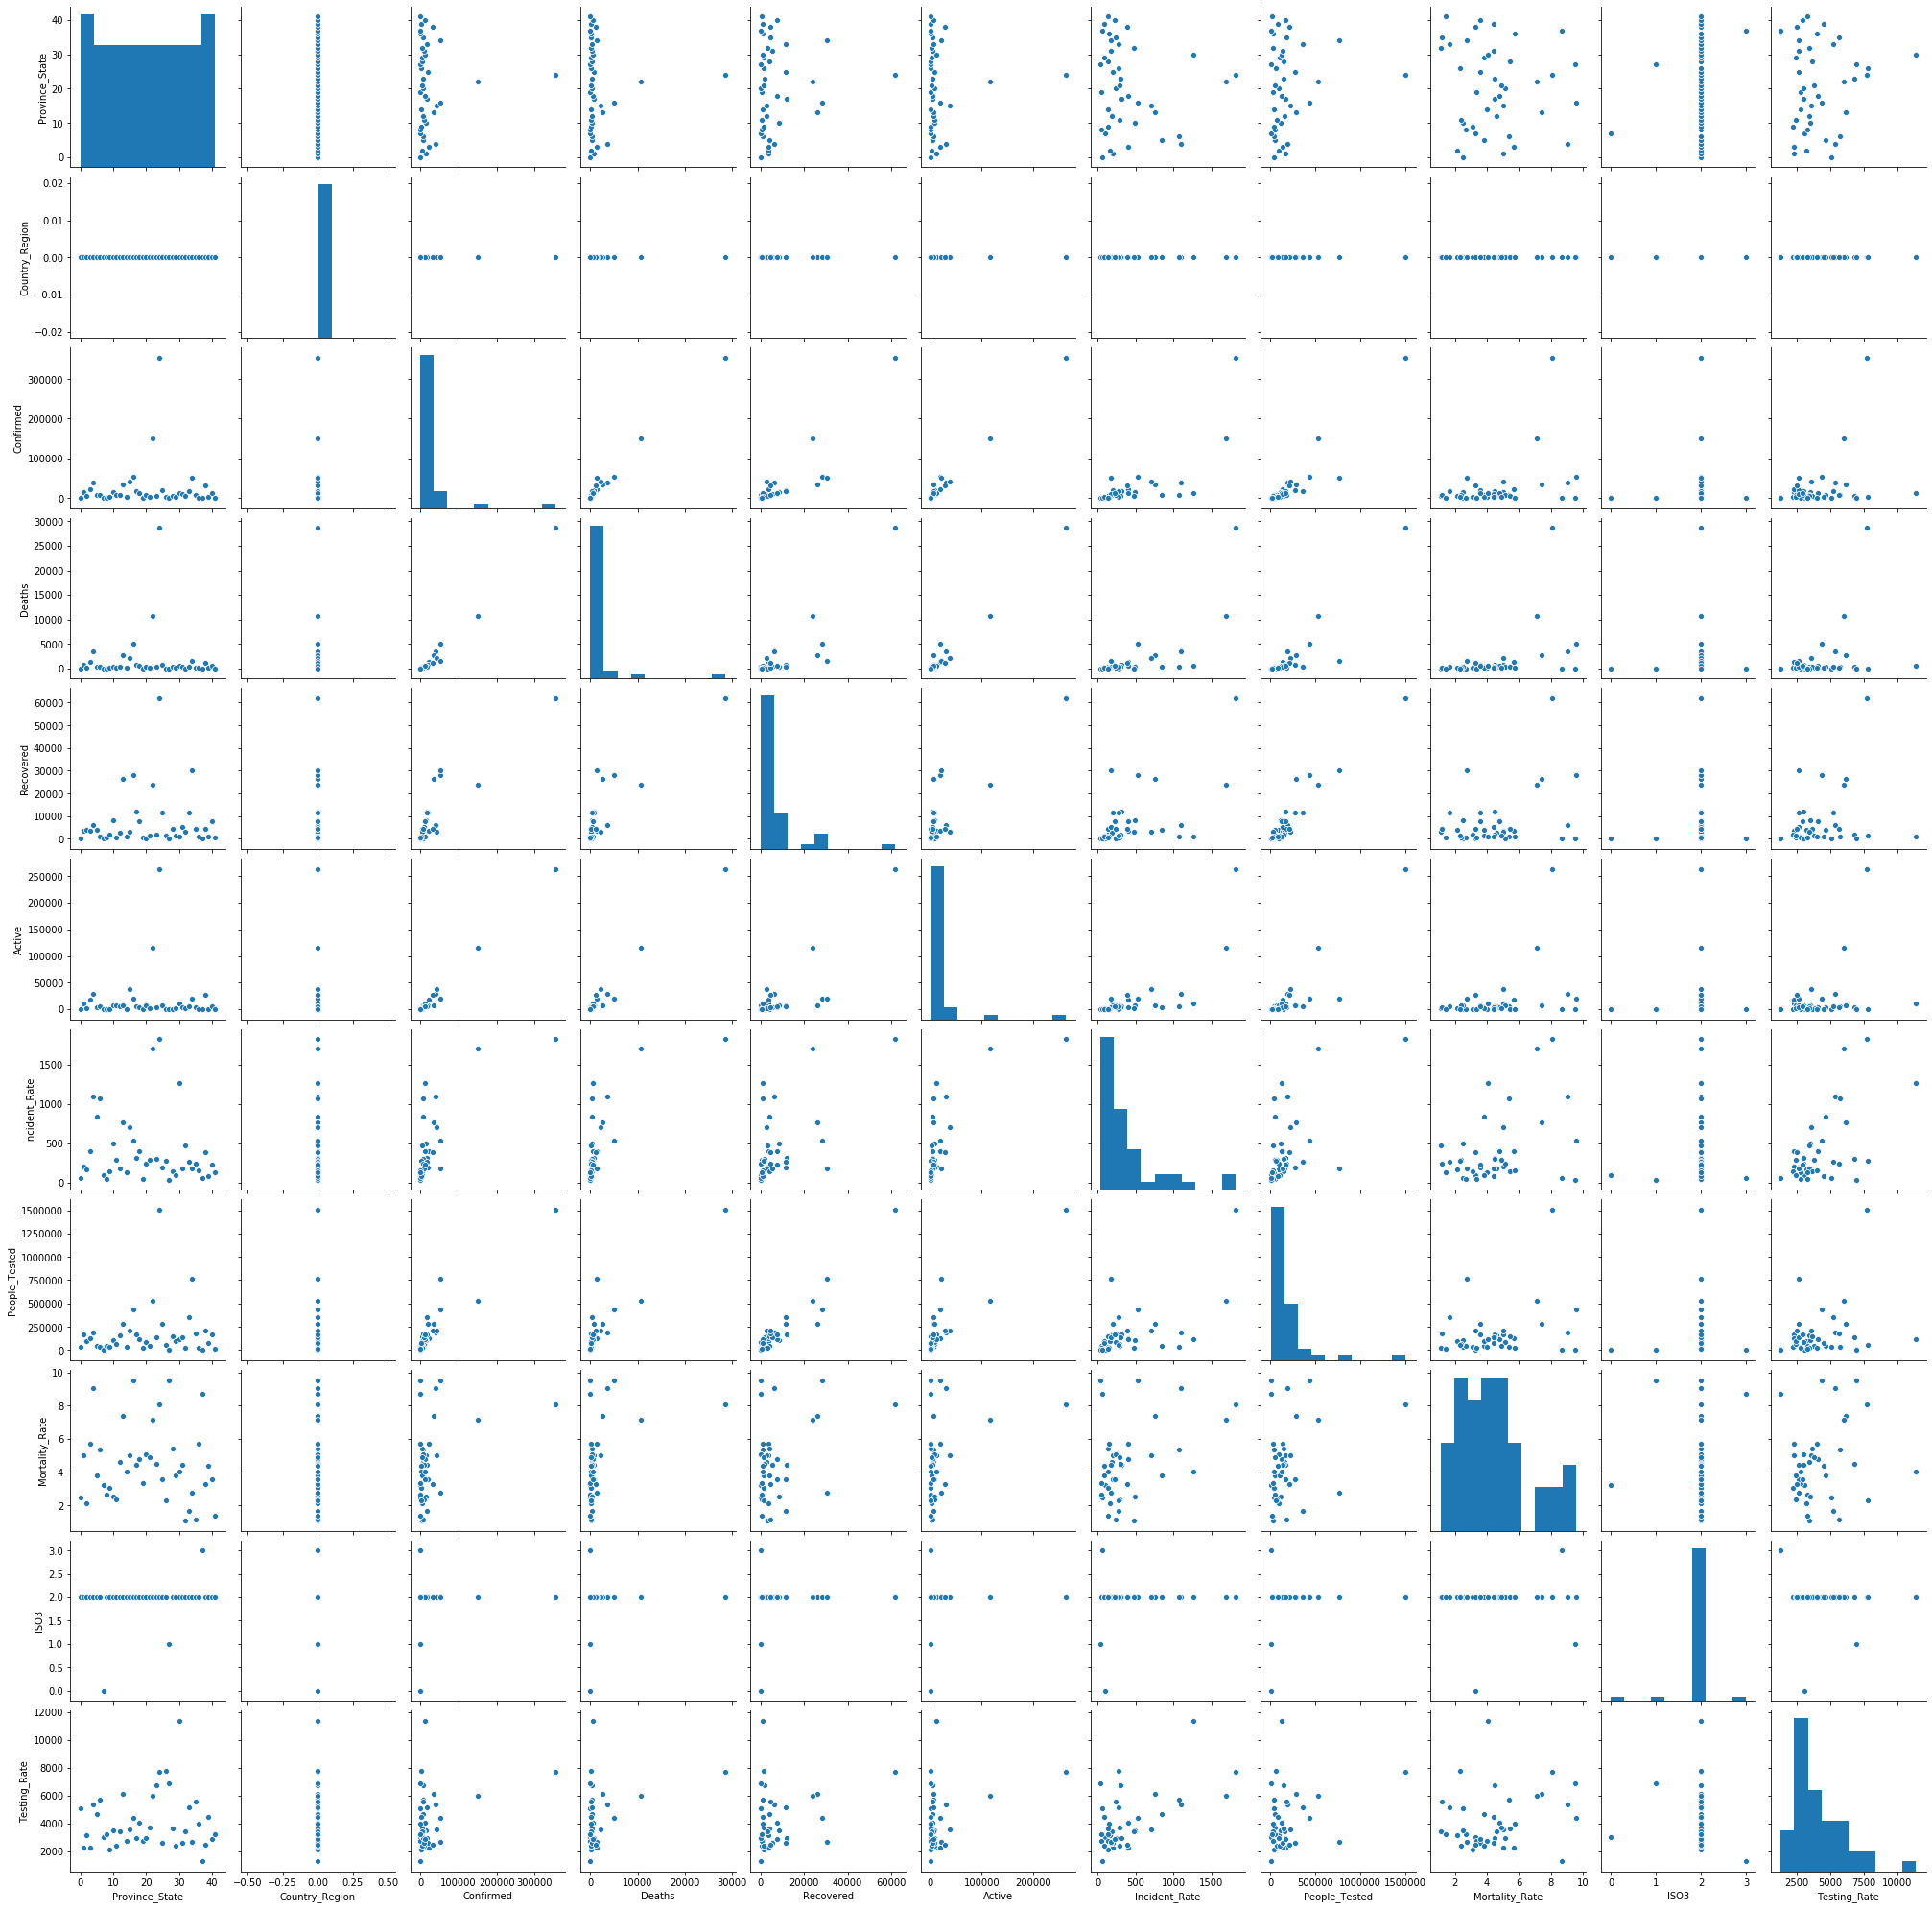

In [149]:
# Checking pairplots
sns.pairplot(nds)
plt.show()

# Find and remove outliers

In [150]:
nds.shape

(42, 11)

In [151]:
nds.dtypes

Province_State      int32
Country_Region      int32
Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
Incident_Rate     float64
People_Tested     float64
Mortality_Rate    float64
ISO3                int32
Testing_Rate      float64
dtype: object

In [152]:
nds[[ 'Recovered','Incident_Rate','People_Tested', 'Mortality_Rate', 'Testing_Rate']] = nds[[ 'Recovered','Incident_Rate','People_Tested', 'Mortality_Rate', 'Testing_Rate']].apply(pd.to_numeric,errors='coerce')

In [153]:
nds.isnull().sum()

Province_State    0
Country_Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
ISO3              0
Testing_Rate      0
dtype: int64

In [154]:
nds.columns

Index(['Province_State', 'Country_Region', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Incident_Rate', 'People_Tested', 'Mortality_Rate', 'ISO3',
       'Testing_Rate'],
      dtype='object')

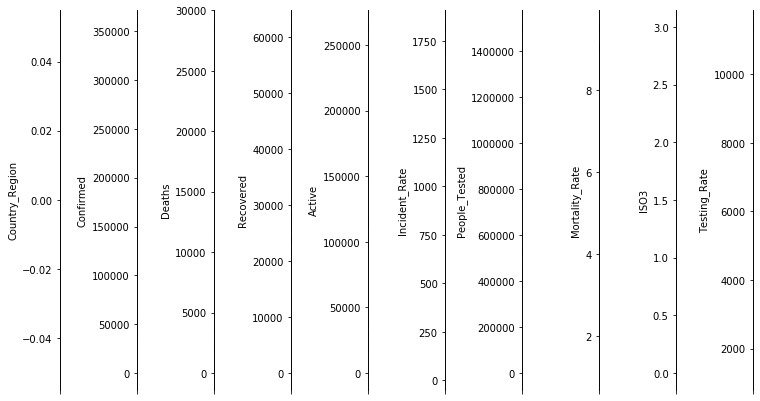

In [155]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=11
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

Could not remove outliers as it removes all data.

# Check and adjust skewness

In [156]:
# Show skewness (less than 0.55 is ok)
nds.skew()

Province_State    0.000000
Country_Region    0.000000
Confirmed         4.947636
Deaths            5.193668
Recovered         3.136333
Active            5.032990
Incident_Rate     1.989192
People_Tested     3.798163
Mortality_Rate    0.806173
ISO3             -3.351203
Testing_Rate      1.585387
dtype: float64

In [157]:
#Treat skewness using log
for col in nds.columns:
    if nds.skew().loc[col]>0.55:
        nds[col]=np.log1p(nds[col])

In [158]:
nds.skew()

Province_State    0.000000
Country_Region    0.000000
Confirmed        -0.735491
Deaths           -0.067897
Recovered        -0.617775
Active           -0.811806
Incident_Rate     0.119138
People_Tested    -0.882061
Mortality_Rate   -0.145010
ISO3             -3.351203
Testing_Rate      0.308185
dtype: float64

# Split data into x and y

In [159]:
nds.columns

Index(['Province_State', 'Country_Region', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Incident_Rate', 'People_Tested', 'Mortality_Rate', 'ISO3',
       'Testing_Rate'],
      dtype='object')

In [160]:
# Lineup target and input values
nds_x=nds.drop(columns=['Deaths'])
y=nds[['Deaths']]

# Apply scaler

In [161]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(nds_x)
x=pd.DataFrame(x,columns=nds_x.columns)

In [162]:
x.skew()

Province_State    0.000000
Country_Region    0.000000
Confirmed        -0.735491
Recovered        -0.617775
Active           -0.811806
Incident_Rate     0.119138
People_Tested    -0.882061
Mortality_Rate   -0.145010
ISO3             -3.351203
Testing_Rate      0.308185
dtype: float64

# Train-Test split

In [163]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [165]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 51 is 0.999853176621404


In [166]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean()

0.9988225554291953

In [167]:
# R2 score gives us a rondom state of 88
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=88, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [168]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.9997840713867941
RMSE is:  0.01872859036965849


# Other regression models

In [169]:
# Loop for SVR types
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9988728993935587
0.8954447555438393
0.8462854575317977


In [170]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
# Prepare a range of alpha values to test
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
# Create and fit a Ridge regression model to test each alpha
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

0.01


In [171]:
# Create and fit a Ridge regression model to test each alpha
model2=Lasso()
grid=GridSearchCV(estimator=model2,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

0.001


In [172]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9997020355456524

In [173]:
# Cross validation score for Ridge Regressor
cross_val_score(linear_model.Ridge(alpha=0.01),x,y,cv=10,scoring='r2').mean()

0.9989541649202526

In [174]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

las=Lasso(alpha=0.001)
las.fit(x_train,y_train)
las.score(x_train,y_train)

0.9997004351369467

I choose the LinearRegression model because it has the best score
r score is:  99.98
RMSE is:  18.7
Cross_val is: 99.9

# Save the model

In [175]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(regr,'US_Covid_deaths.pkl')

['US_Covid_deaths.pkl']

In [176]:
# Load and use model to make a prediction
model=joblib.load('US_Covid_deaths.pkl')
model.predict(x_test)

array([[2.48092145],
       [4.25155005],
       [4.7008078 ],
       [6.00916934],
       [2.81684782],
       [6.65769732],
       [5.25830168],
       [4.3652963 ],
       [4.98187817]])

# For Recovered

In [185]:
# Lineup target and input values
rnds_x=nds.drop(columns=['Recovered'])
ry=nds[['Recovered']]

# Apply scaler

In [186]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
rx=sc.fit_transform(rnds_x)
rx=pd.DataFrame(rx,columns=rnds_x.columns)

In [187]:
rx.skew()

Province_State    0.000000
Country_Region    0.000000
Confirmed        -0.735491
Deaths           -0.067897
Active           -0.811806
Incident_Rate     0.119138
People_Tested    -0.882061
Mortality_Rate   -0.145010
ISO3             -3.351203
Testing_Rate      0.308185
dtype: float64

# Train-Test split

In [188]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(rx,ry, random_state=55, test_size=0.20)

# Model

In [191]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(rx,ry, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 68 is 0.9582211067539458


In [192]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),rx,ry,cv=10,scoring='r2').mean()

0.7941544359564819

In [193]:
# R2 score gives us a rondom state of 68
x_train,x_test, y_train, y_test = train_test_split(rx,ry, random_state=68, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [194]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.9582211067539458
RMSE is:  0.34520180126428274


In [195]:
# Prepare a range of alpha values to test
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
# Create and fit a Ridge regression model to test each alpha
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

0.1


In [196]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

rd=Ridge(alpha=0.1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9085839969725977

I choose the LinearRegression model because it has the best score
r score is:  95.8
RMSE is:  34.5
Cross_val is: 79.4

# Save the model

In [198]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(regr,'US_Covid_recovered.pkl')

['US_Covid_recovered.pkl']

In [199]:
# Load and use model to make a prediction
model=joblib.load('US_Covid_recovered.pkl')
model.predict(x_test)

array([[ 4.25644993],
       [ 8.23610188],
       [ 9.1536926 ],
       [ 6.86114653],
       [ 8.55025422],
       [ 6.92422503],
       [ 8.68882081],
       [10.0829396 ],
       [ 8.2332507 ]])